In [1]:
from fbprophet import Prophet
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import os

Importing plotly failed. Interactive plots will not work.


In [2]:
sample = pd.read_csv('../data/sample3.csv')

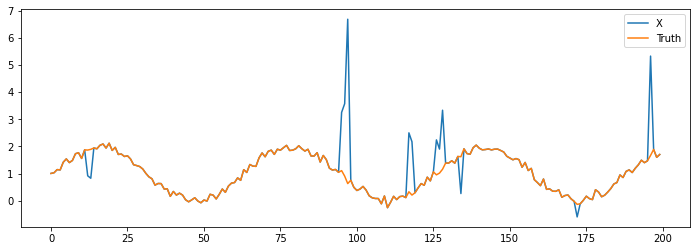

In [3]:
plt.figure(figsize=(12, 4))
sample[:200].plot(ax=plt.gca())
plt.legend()
plt.show()

In [4]:
ds = [pd.to_datetime('2020-01-01')]
for i in range(sample.shape[0]-1):
    ds.append(ds[-1] + pd.offsets.Day(1))

proph_df = pd.DataFrame({'ds': ds, 'y': sample.X})
proph_df

ds         y
0    2020-01-01  1.002849
1    2020-01-02  1.028838
2    2020-01-03  1.144016
3    2020-01-04  1.133551
4    2020-01-05  1.415878
...         ...       ...
1995 2025-06-18  0.235249
1996 2025-06-19  0.048924
1997 2025-06-20  0.075755
1998 2025-06-21  0.023985
1999 2025-06-22  0.046545

[2000 rows x 2 columns]

In [5]:
forecaster = Prophet()
forecaster.fit(proph_df)
future_df = forecaster.make_future_dataframe(periods=0)
forecast_df = forecaster.predict(future_df)
forecast_df.head()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2020-01-01  1.088603   -0.487326    2.625401     1.088603     1.088603   
1 2020-01-02  1.088267   -0.348964    2.522738     1.088267     1.088267   
2 2020-01-03  1.087932   -0.256967    2.681783     1.087932     1.087932   
3 2020-01-04  1.087596   -0.327788    2.581743     1.087596     1.087596   
4 2020-01-05  1.087261   -0.345389    2.460701     1.087261     1.087261   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        0.016370              0.016370              0.016370 -0.017387   
1        0.000121              0.000121              0.000121 -0.035003   
2        0.111578              0.111578              0.111578  0.074236   
3        0.136784              0.136784              0.136784  0.096287   
4        0.017833              0.017833              0.017833 -0.026806   

   weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0     -0.017387     -0.017387  0.033757      0.033757      0.033757   
1     -0.035003     -0.035003  0.035123      0.035123      0.035123   
2      0.074236      0.074236  0.037342      0.037342      0.037342   
3      0.096287      0.096287  0.040496      0.040496      0.040496   
4     -0.026806     -0.026806  0.044639      0.044639      0.044639   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper      yhat  
0                         0.0  1.104973  
1                         0.0  1.088388  
2                         0.0  1.199510  
3                         0.0  1.224380  
4                         0.0  1.105094

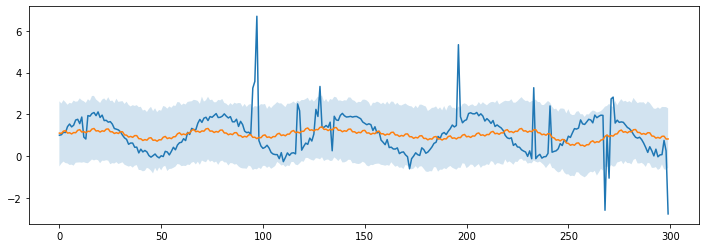

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(sample.X[:300])
plt.plot(forecast_df.yhat[:300])
plt.fill_between(range(300), forecast_df.yhat_lower[:300], forecast_df.yhat_upper[:300], alpha=0.2)
plt.show()

In [7]:
def clean(X):
    X_clean = X.copy()
    
    ds = [pd.to_datetime('2020-01-01')]
    for i in range(X_clean.shape[0]-1):
        ds.append(ds[-1] + pd.offsets.Day(1))

    proph_df = pd.DataFrame({'ds': ds, 'y': X_clean})
    proph_df
    
    forecaster = Prophet()
    forecaster.fit(proph_df)
    future_df = forecaster.make_future_dataframe(periods=0)
    forecast_df = forecaster.predict(future_df)
    X_clean[X_clean > forecast_df.yhat_upper] = None
    X_clean[X_clean < forecast_df.yhat_lower] = None
    X_clean = pd.Series(X_clean).interpolate().values
    X_clean = pd.Series(X_clean).fillna(method='ffill').values
    X_clean = pd.Series(X_clean).fillna(method='bfill').values
    return X_clean

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(sample.X[:200])
plt.plot(clean(clean(sample.X[:200])))
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


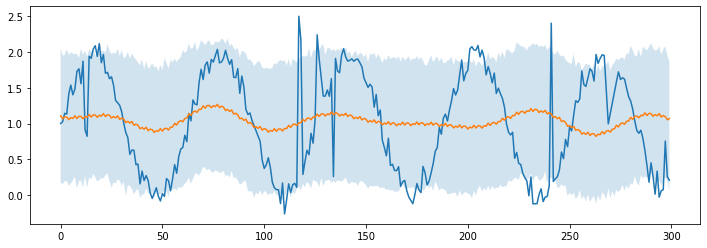

In [9]:
ds = [pd.to_datetime('2020-01-01')]
for i in range(sample.shape[0]-1):
    ds.append(ds[-1] + pd.offsets.Day(1))
proph_df = pd.DataFrame({'ds': ds, 'y': clean(sample.X)})
forecaster = Prophet()
forecaster.fit(proph_df)
future_df = forecaster.make_future_dataframe(periods=0)
forecast_df = forecaster.predict(future_df)
plt.figure(figsize=(12, 4))
plt.plot(clean(sample.X)[:300])
plt.plot(forecast_df.yhat[:300])
plt.fill_between(range(300), forecast_df.yhat_lower[:300], forecast_df.yhat_upper[:300], alpha=0.2)
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


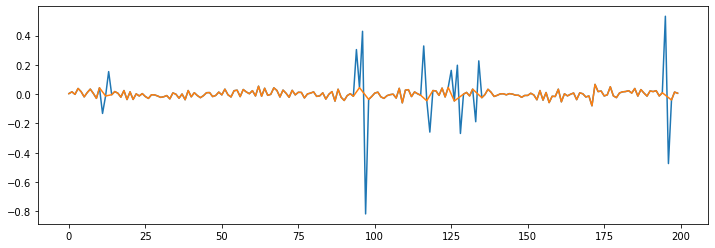

In [14]:
X_diff = sample.X.values[1:] - sample.X.values[:-1]
X_diff = X_diff / np.linalg.norm(X_diff, np.inf)
plt.figure(figsize=(12, 4))
plt.plot(X_diff[:200])
plt.plot(clean(X_diff[:200]))
plt.show()

In [120]:
def get_files_list(path):
    files = []
    for aname in os.listdir(path):
        if (aname[-3:] == "csv") or (aname[-3:] == "txt"): 
            files.append(os.path.join(path, aname))
    return files

def run_tests(dir_path):
    
    print("Dataset: ", dir_path)
    files = get_files_list(dir_path)
    files.sort()
    
    report = pd.DataFrame(columns=["Sample", "RMSE"])
    
    for afile in files:
        
        print("File: ", afile)
            
        data = pd.read_csv(afile, index_col=False)
        
        X      = data['X'].values
        X_true = data['Truth'].values
        
        X_clean = clean(clean(X))
        
        rmse = mean_squared_error(X_true, X_clean, squared=False)
        
        report.loc[len(report)] = [afile, rmse]
        print("RMSE: ", rmse)
            
    return report

In [121]:
report = run_tests('../data/')
report

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Dataset:  ../data/
File:  ../data/sample1.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE:  0.05800683367720809
File:  ../data/sample2.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE:  0.06244493492485141
File:  ../data/sample3.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE:  0.25621272349994506
File:  ../data/sample4.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE:  0.23811651402626868
File:  ../data/sample5.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE:  0.23235167202119056
File:  ../data/sample6.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE:  2.64245221039946
File:  ../data/sample7.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE:  6.696567469586046
File:  ../data/sample8.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE:  1.4820270409493823
File:  ../data/sample9.csv


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE:  111.157737026965


Sample        RMSE
0  ../data/sample1.csv    0.058007
1  ../data/sample2.csv    0.062445
2  ../data/sample3.csv    0.256213
3  ../data/sample4.csv    0.238117
4  ../data/sample5.csv    0.232352
5  ../data/sample6.csv    2.642452
6  ../data/sample7.csv    6.696567
7  ../data/sample8.csv    1.482027
8  ../data/sample9.csv  111.157737

In [123]:
board = pd.DataFrame(columns=['Data preparation', 'Model']+['sample'+str(i) for i in range(1, 10)])
board.loc[len(board)] = ['No', 'Prophet'] + list(report['RMSE'].values)
board = board.set_index(['Data preparation', 'Model'])
board

sample1   sample2   sample3   sample4   sample5  \
Data preparation Model                                                       
No               Prophet  0.058007  0.062445  0.256213  0.238117  0.232352   

                           sample6   sample7   sample8     sample9  
Data preparation Model                                              
No               Prophet  2.642452  6.696567  1.482027  111.157737

In [124]:
board.to_csv('../results/no_prophet.csv')